# Logistic Regression

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Load the wine quality dataset from a CSV 

In [2]:
data_set = pd.read_csv('winequality-red.csv')
data_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Explore the dataset

In [3]:
data_set["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
data_set.shape

(1599, 12)

In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data_set.isnull().values.any()

False

In [7]:
data_set.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Visualize the dataset

<AxesSubplot:>

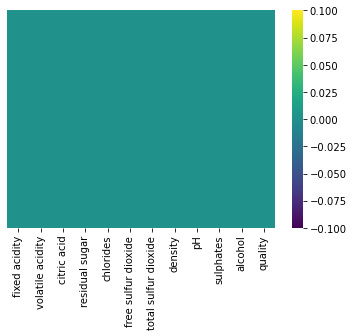

In [8]:
sns.heatmap(data_set.isnull(), yticklabels=False, cmap='viridis')

# Quality Classification
## Determine the threshold value using median

In [9]:
# Determine threshold value using median
median_quality = data_set["quality"].median()
data_set["quality"] = [1 if i > median_quality else 0 for i in data_set["quality"]]


In [10]:
data_set.describe().quality

count    1599.000000
mean        0.135710
std         0.342587
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: quality, dtype: float64

In [11]:
x_data = data_set.drop(['quality'],axis=1)
y = data_set.quality.values

In [12]:
x_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [13]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<AxesSubplot:>

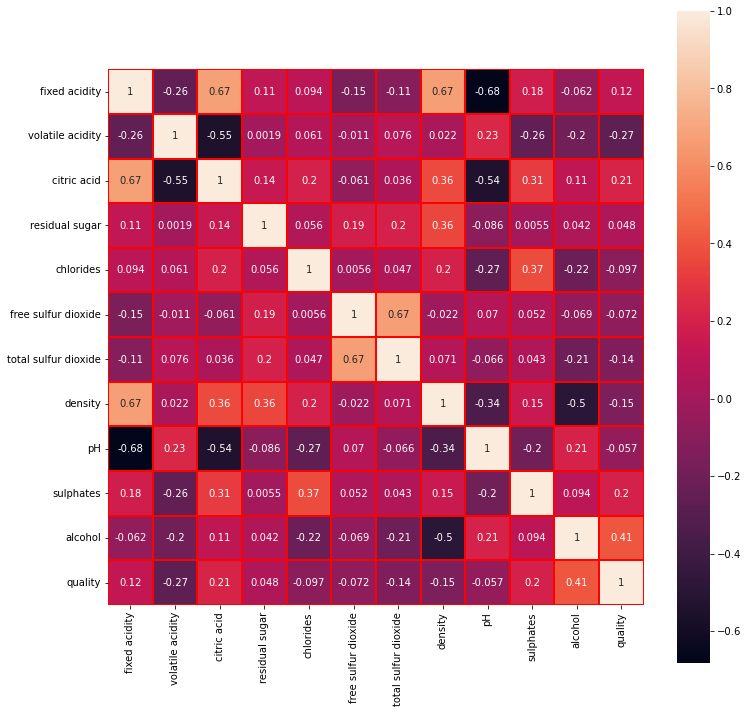

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(data_set.corr(), linewidths=0.2, vmax=1.0, square=True, linecolor='red', annot=True)

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

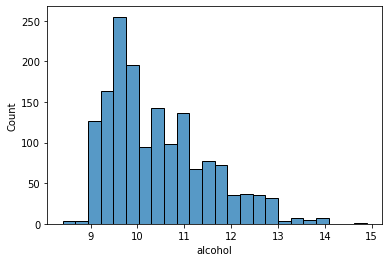

In [15]:
sns.histplot(data=data_set["alcohol"])

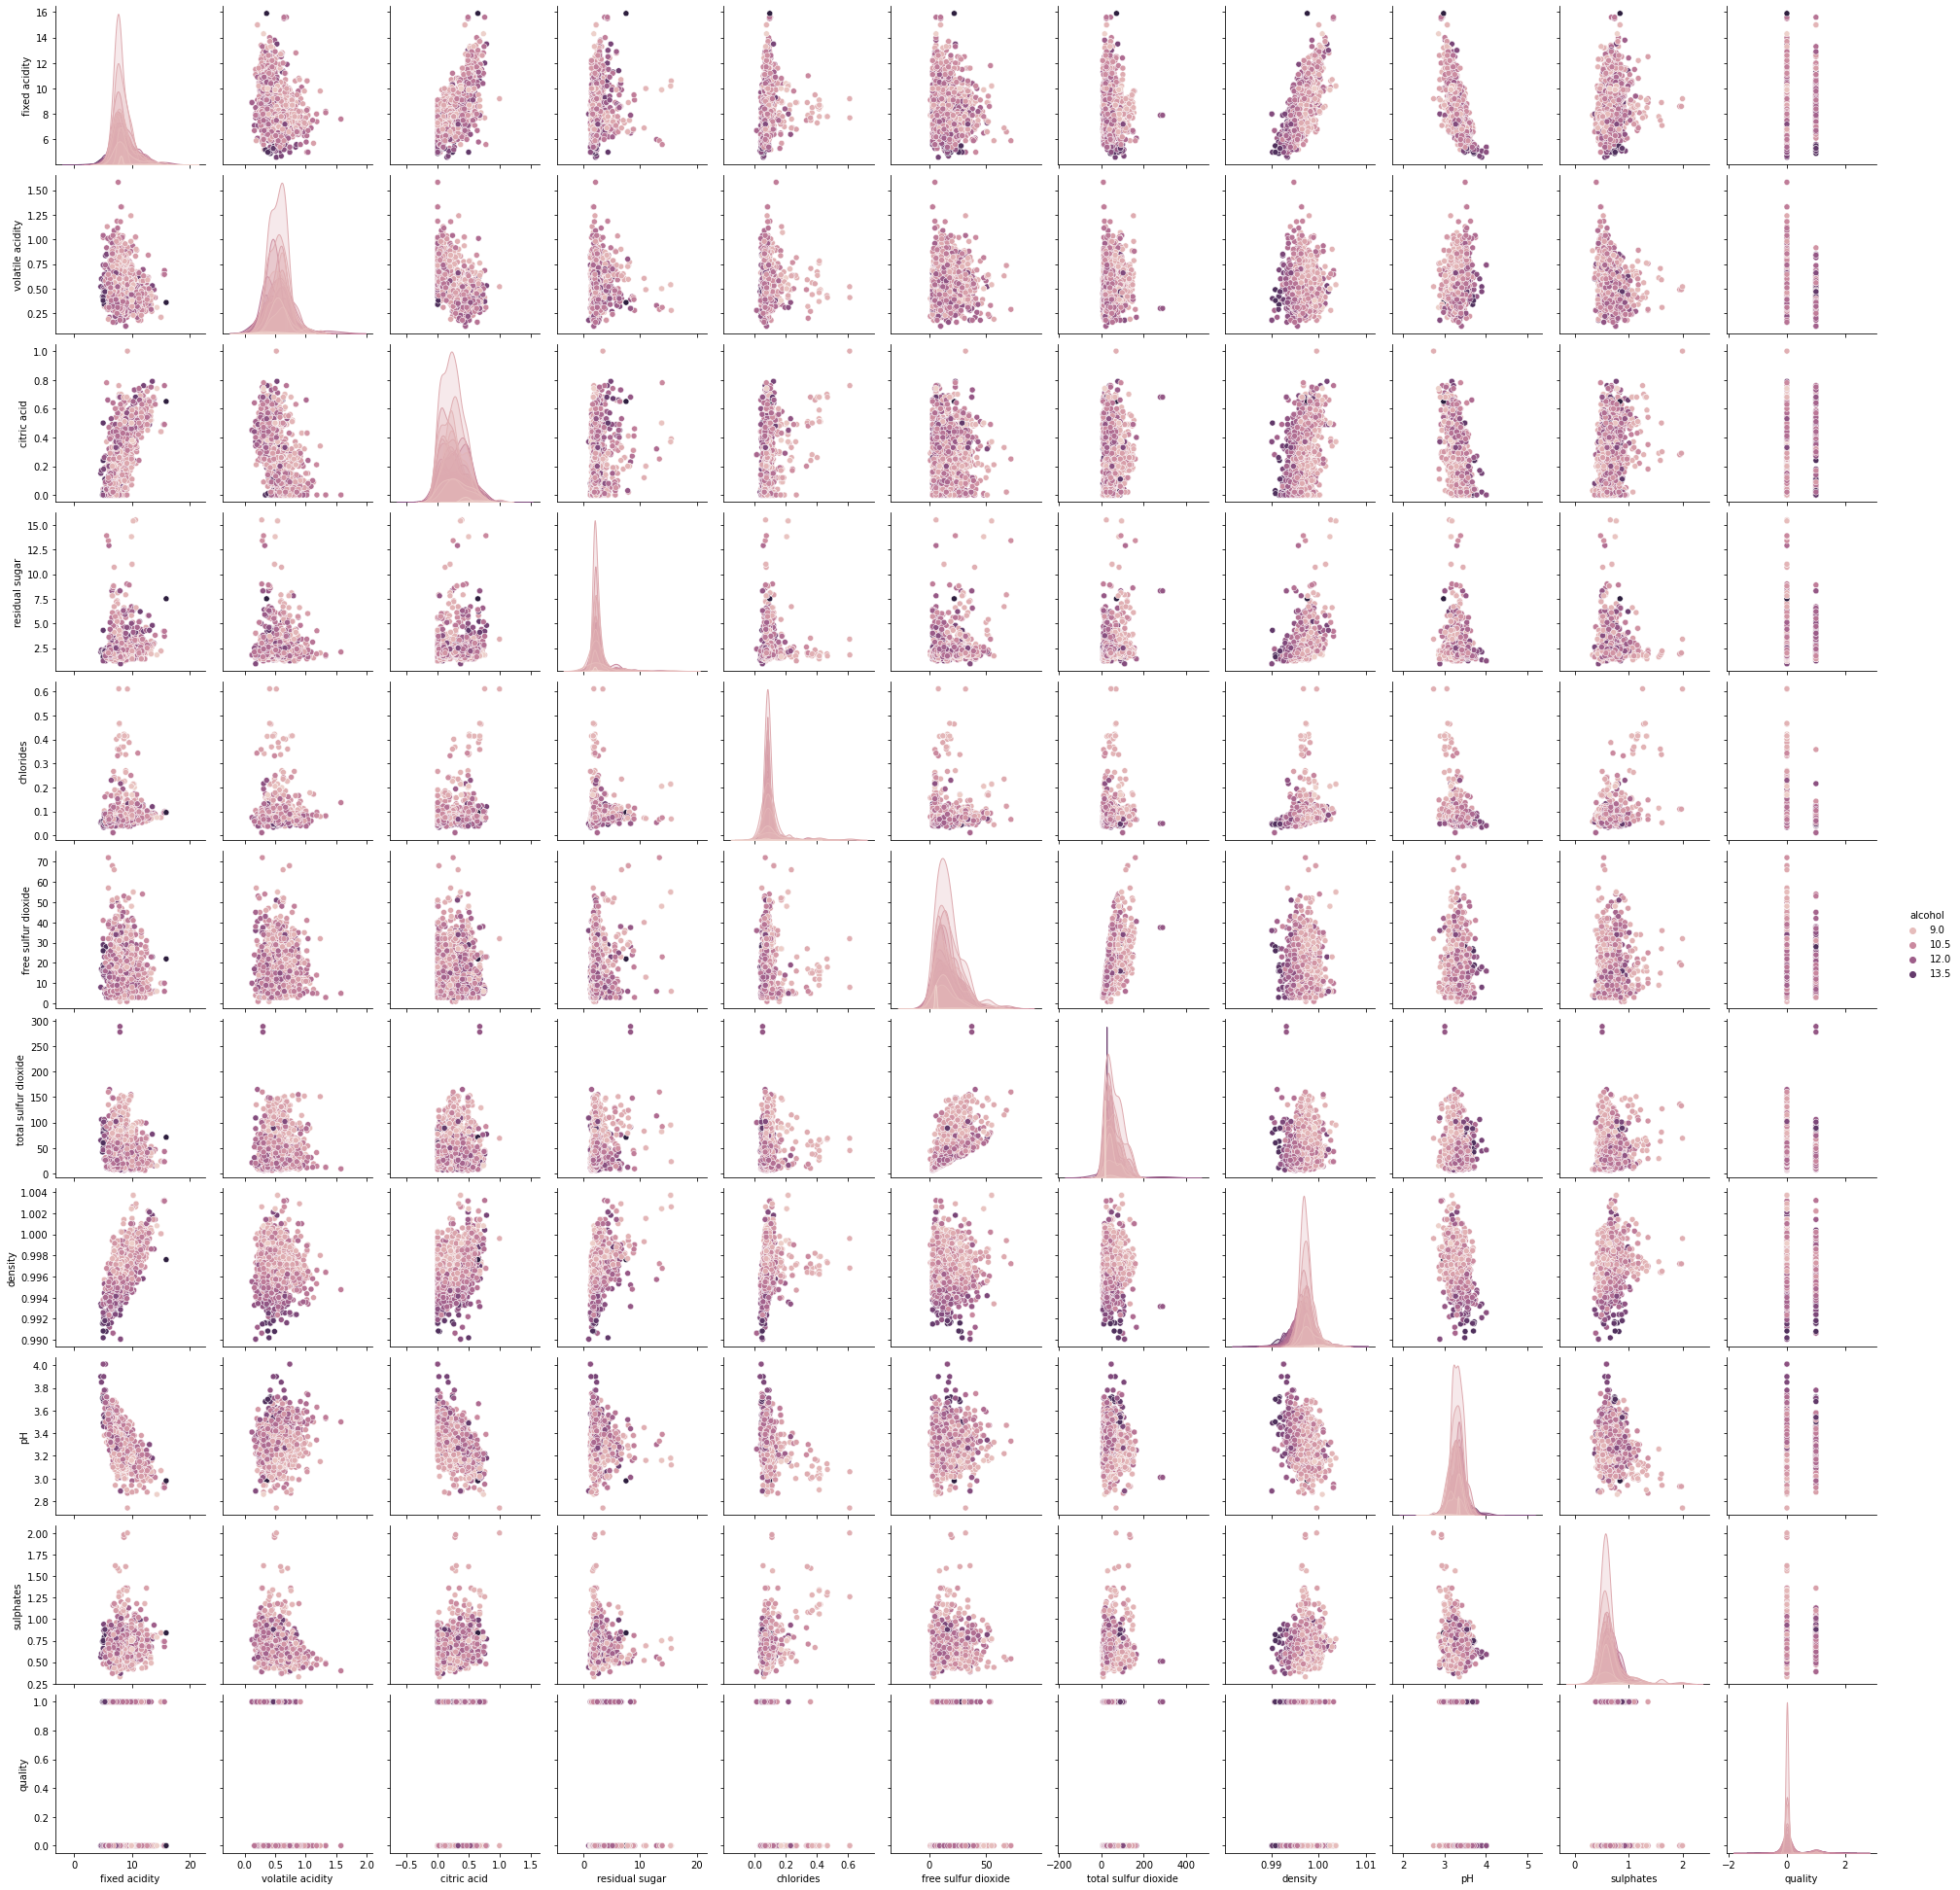

In [16]:
sns.pairplot(data=data_set,hue="alcohol")

<AxesSubplot:xlabel='density', ylabel='Count'>

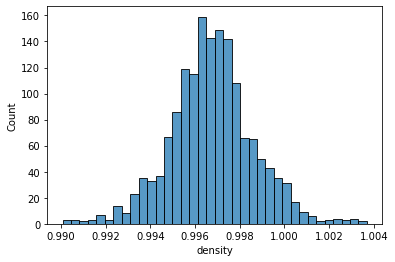

In [17]:
sns.histplot(data=data_set["density"])

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

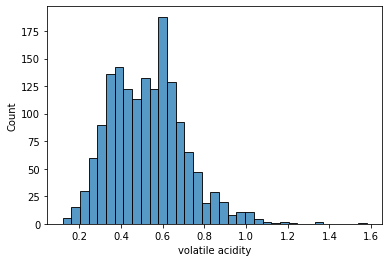

In [18]:
sns.histplot(data=data_set["volatile acidity"])

0.19368349811284427


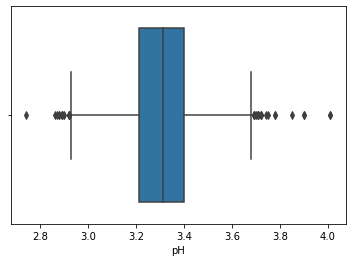

In [19]:
sns.boxplot(data_set["pH"])
print(data_set['pH'].skew())

In [20]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [21]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (11, 1279)
x_test:  (11, 320)
y_train:  (1279,)
y_test:  (320,)


# Initialize weights and bias for logistic regression

In [23]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

# Define a sigmoid function

In [24]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head
print(sigmoid(0))

0.5


# Define forward and backward propagation functions to compute cost and gradients.

In [25]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost,gradients

In [26]:
# Define an update function to update weights and bias for the specified number of iterations and learning rate.
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

# Define a predict function to predict the output based on the updated weights and bias.

In [27]:
def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction.T


# Define a logistic regression function to train the model

In [28]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print("test accuracy: {} %".format(accuracy_score(y_test, y_prediction_test)*100))

Cost after iteration 0: 0.703827
Cost after iteration 10: 0.387568
Cost after iteration 20: 0.378167
Cost after iteration 30: 0.369955
Cost after iteration 40: 0.362541
Cost after iteration 50: 0.355845
Cost after iteration 60: 0.349797
Cost after iteration 70: 0.344331
Cost after iteration 80: 0.339388
Cost after iteration 90: 0.334912
Cost after iteration 100: 0.330854
Cost after iteration 110: 0.327170
Cost after iteration 120: 0.323821
Cost after iteration 130: 0.320771
Cost after iteration 140: 0.317990
Cost after iteration 150: 0.315449
Cost after iteration 160: 0.313124
Cost after iteration 170: 0.310993
Cost after iteration 180: 0.309036
Cost after iteration 190: 0.307236
Cost after iteration 200: 0.305578
Cost after iteration 210: 0.304047
Cost after iteration 220: 0.302633
Cost after iteration 230: 0.301323
Cost after iteration 240: 0.300109
Cost after iteration 250: 0.298981
Cost after iteration 260: 0.297931
Cost after iteration 270: 0.296954
Cost after iteration 280: 0.296

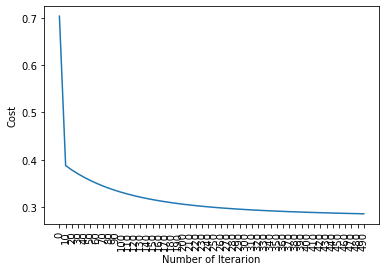

test accuracy: 85.625 %


In [29]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 500)      